## Insurance Cost Analysis

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [28]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(url, header=None)
df_org = df
# df.to_csv("Insurance cost.csv")

In [29]:
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [30]:
colnames = ['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns = colnames
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


## Data cleaning

In [32]:
df['age'].value_counts()

age
18    148
19    142
47     62
52     62
45     62
23     62
46     60
54     60
51     60
21     60
28     60
22     60
26     60
25     58
27     58
50     58
20     58
53     58
48     58
49     56
24     56
44     56
41     56
56     56
30     56
32     56
33     54
43     54
42     54
29     54
57     54
31     54
40     54
34     52
58     52
55     52
59     52
37     52
39     50
36     50
38     50
35     50
62     48
61     46
60     46
64     46
63     46
?       4
Name: count, dtype: int64

In [33]:
df = df.replace("?",np.nan)
df.isna().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [34]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')         # Numeric with NaNs perserved
df['age'] = df['age'].fillna(df['age'].mean())
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])
df['smoker'] = df['smoker'].astype('int')
df.info()
df_org = df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   float64
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(3), int32(1), int64(3)
memory usage: 140.9 KB


## Exploratory data analysis

In [35]:
num_features = ['age','bmi','no_of_children']
cat_features = ['gender','smoker','region']

In [24]:
df[['age','bmi','no_of_children','charges']].corr()

,age,bmi,no_of_children,charges
age,1.000000,0.113045,0.037585,0.298622
bmi,0.113045,1.000000,-0.001492,0.199846
no_of_children,0.037585,-0.001492,1.000000,0.066442
charges,0.298622,0.199846,0.066442,1.000000


In [36]:
df_org['gender'] = df_org['gender'].apply(lambda x: 'male' if x == 1 else 'female')
#df_org['region'] = df_org['region'].apply(lambda x: 'NW' if x == 1 else 'NE' if x == 2 else 'SW' if x == 3 else 'SE' if x == 4 esle np.nan)
region_map = {1:'NE',2:'NW',3:'SW',4:'SE'}
df_org['region'] = df['region'].map(region_map)

Text(0.5, 1.0, 'Distribution of charges with respect to gender')

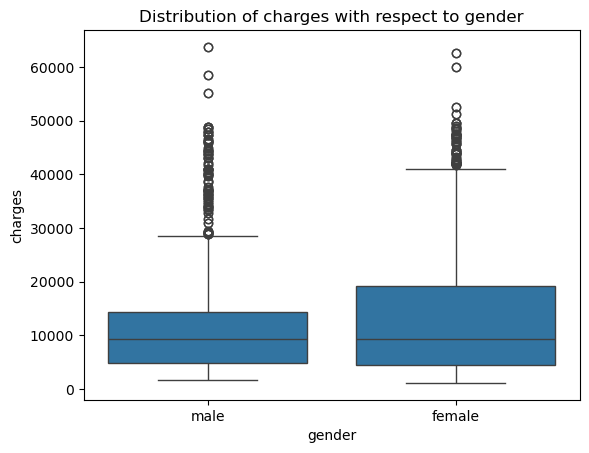

In [37]:
sns.boxplot(x='gender',y='charges',data=df_org)
plt.title('Distribution of charges with respect to gender')

Text(0.5, 1.0, 'Distribution of charges with respect to smoking')

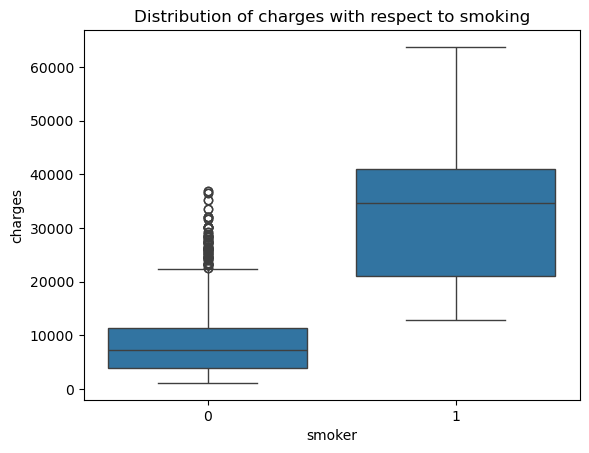

In [38]:
sns.boxplot(x='smoker',y='charges',data=df_org)
plt.title('Distribution of charges with respect to smoking')

<Axes: xlabel='region', ylabel='charges'>

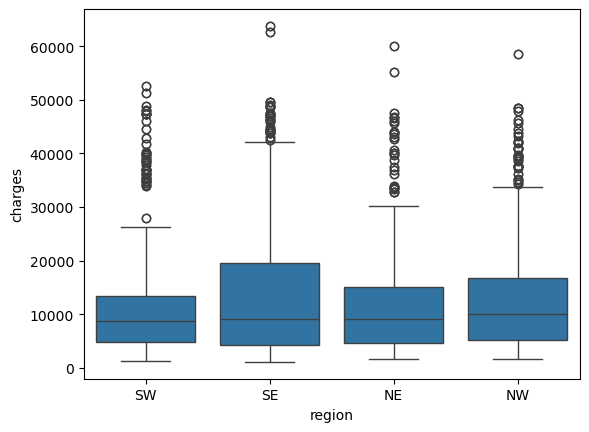

In [39]:
sns.boxplot(x='region',y='charges',data=df_org)

## Modeling

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   float64
 1   gender          2772 non-null   object 
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   object 
 6   charges         2772 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 140.9+ KB


In [16]:
# Features & target
X = df.drop('charges',axis=1)
y = df['charges']

In [18]:
X

,age,gender,bmi,no_of_children,smoker,region
0,19.0,male,27.900,0,1,SW
1,18.0,female,33.770,1,0,SE
2,28.0,female,33.000,3,0,SE
3,33.0,female,22.705,0,0,NE
4,32.0,female,28.880,0,0,NE
...,...,...,...,...,...,...
2767,47.0,male,45.320,1,0,SE
2768,21.0,male,34.600,0,0,SW
2769,19.0,female,26.030,1,1,NE
2770,23.0,female,18.715,0,0,NE


In [17]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### Preprocessing

In scikit-learn, a transformer is any object that implements a .fit() and .transform method. \
They are used to modify or preprocess the input data (e.g., scale, encoed, extract) before it is passed to a model

In [20]:
# Transformer for numeric data
numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False))
])

In [21]:
# Transformer for categorical data
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

In [22]:
# Combining numerical and categoriacl transformer into one preprocessor
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

ColumnTransformer([...]) applies diferent transformation to different columns

ColumnTransformer(transformers, remainder='drop', sparse_treshold=0.3,...)
- transformers    - a list of 3-tuples (name, transformer, columns)
    - name         - defined fo later access/debuging
    - transformer  - transformer to apply (it can be a pipeline)
    - columns      - a list of columns
- remainder       - what to do with the columns that aren't explicilty tranformed ('drop','passthrough')
- spare_treshold  - converts output to dense if proportion of spare features is below this treshold

#### Final pipeline

In [23]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

In [ ]:
# Pipeline([
#     ('step1_name', transformer1),
#     ('step2_name', transformer2),
#     ...
#     ('final_step', estimator)
# ])

#### Gride Search

In [52]:
param_grid = {
    'preprocessor__num__poly__degree':[1,2],
    'regressor__alpha': [0.01,0.1,1,10,100]
}

In [53]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
# verbose=1   - print when each fold starts
# n_jobs =-1  - running fitting on multiple CPU cores
print("Starting GridSearch...")
grid.fit(x_train, y_train)
print("Done!")

Starting GridSearch...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Done!


In [54]:
# Best model
best_model = grid.best_estimator_
y_pred_best_model = best_model.predict(x_test)

In [55]:
MSE_test_best_model = mean_squared_error(y_test, y_pred_best_model)
R2_test_best_model = r2_score(y_test, y_pred_best_model)

In [57]:
print("Best parameters: ", grid.best_params_)
print("Test MSE: ", MSE_test_best_model)
print("Test R2: ", R2_test_best_model)

Best parameters:  {'preprocessor__num__poly__degree': 2, 'regressor__alpha': 0.1}
Test MSE:  39614771.7036928
Test R2:  0.7468196459610217
